In [180]:
df=pd.read_csv("sales_data.csv",parse_dates = True, index_col="Month")

In [181]:
df.head()

,Sales
Month,
1965-01-01,339.28
1965-02-01,429.62
1965-03-01,469.72
1965-04-01,204.26
1965-05-01,266.88


In [182]:
import matplotlib.pyplot as plt

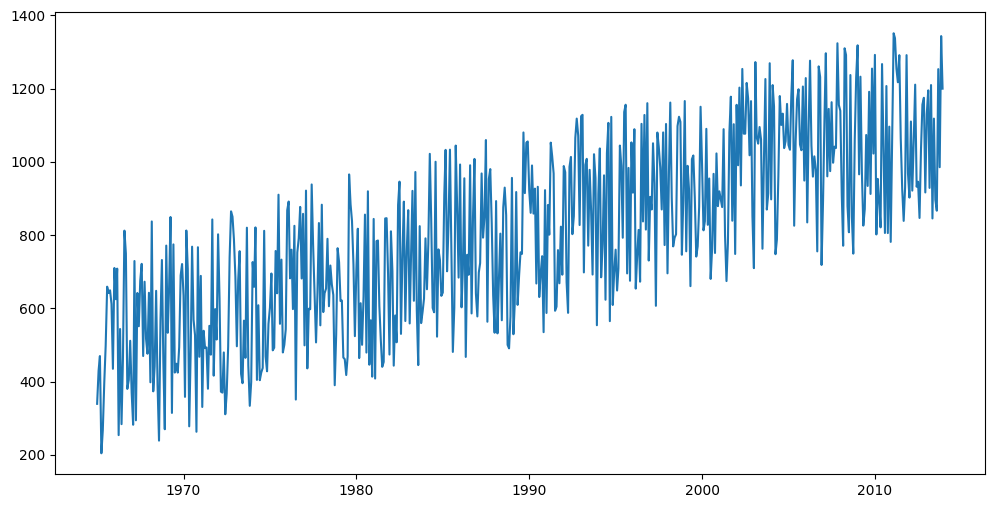

In [183]:
plt.figure(figsize=(12, 6))
plt.plot(df["Sales"])
plt.show()

In [184]:
from statsmodels.tsa.stattools import adfuller

In [185]:
adfuller(df)

(-1.1702342446710114,
 0.6862673736759431,
 17,
 570,
 {'1%': -3.441874550188182,
  '5%': -2.8666239496633246,
  '10%': -2.569477593105571},
 7484.808833417414)

In [186]:
df_diff = df.diff().dropna()

In [187]:
adfuller(df_diff)

(-10.33236143720269,
 2.8207762866829967e-18,
 16,
 570,
 {'1%': -3.441874550188182,
  '5%': -2.8666239496633246,
  '10%': -2.569477593105571},
 7469.781553368336)

In [188]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


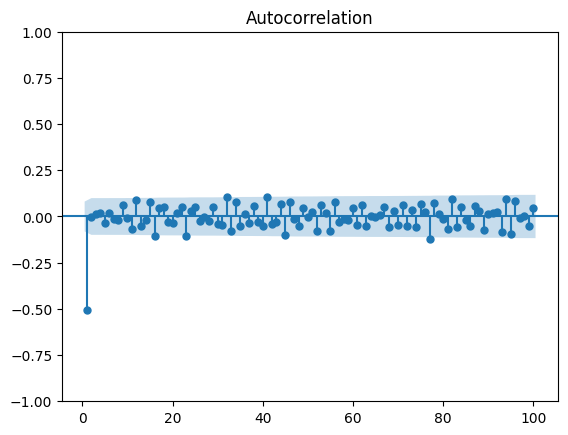

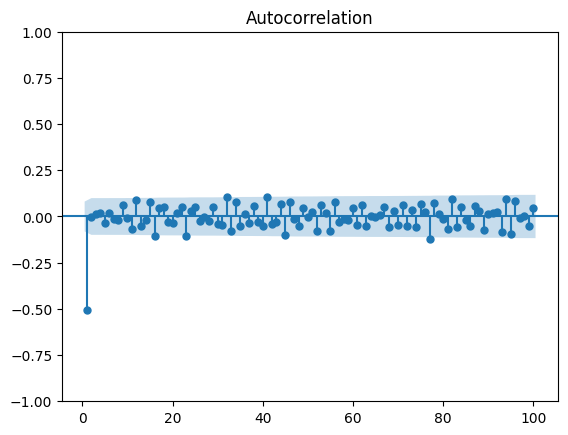

In [189]:
plot_acf(df_diff, lags = 100, zero = False)


In [190]:
import pmdarima as pm

In [191]:
results = pm.auto_arima(df, seasonal = True, m = 12, d = 1, D = 1, information_criterion = "bic", trace = True, error_action = "ignore", n_fits = 100, stepwise = True)

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,1,1)[12]             : BIC=inf, Time=4.55 sec
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=8288.829, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=8003.653, Time=0.40 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=inf, Time=0.82 sec
 ARIMA(1,1,0)(0,1,0)[12]             : BIC=8140.699, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : BIC=7961.490, Time=0.87 sec
 ARIMA(1,1,0)(2,1,1)[12]             : BIC=inf, Time=3.52 sec
 ARIMA(1,1,0)(1,1,1)[12]             : BIC=inf, Time=1.26 sec
 ARIMA(0,1,0)(2,1,0)[12]             : BIC=8104.630, Time=0.40 sec
 ARIMA(2,1,0)(2,1,0)[12]             : BIC=7891.381, Time=1.43 sec
 ARIMA(2,1,0)(1,1,0)[12]             : BIC=7941.698, Time=0.69 sec
 ARIMA(2,1,0)(2,1,1)[12]             : BIC=inf, Time=5.71 sec
 ARIMA(2,1,0)(1,1,1)[12]             : BIC=inf, Time=1.93 sec
 ARIMA(3,1,0)(2,1,0)[12]             : BIC=7857.378, Time=1.34 sec
 ARIMA(3,1,0)(1,1,0)[12]             : BIC=7900.2

In [192]:
results. summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  588
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -3894.133
Date:                            Sat, 25 Feb 2023   AIC                           7804.266
Time:                                    12:49:29   BIC                           7839.101
Sample:                                01-01-1965   HQIC                          7817.852
                                     - 12-01-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8057      0.041    -19.764      0.000      -0.886      -0.726
ar.L2         -0.6668      0.054    -12.295      0.000      -0.773      -0.560
ar.L3         -0.4766      0.057     -8.325      0.000      -0.589      -0.364
ar.L4         -0.2868      0.055     -5.216      0.000      -0.395      -0.179
ar.L5         -0.1791      0.043     -4.131      0.000      -0.264      -0.094
ar.S.L12      -0.6382      0.043    -14.794      0.000      -0.723      -0.554
ar.S.L24      -0.3093      0.043     -7.128      0.000      -0.394      -0.224
sigma2       4.42e+04   3005.583     14.708      0.000    3.83e+04    5.01e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                 5.66
Prob(Q):                              0.56   Prob(JB):                         0.06
Heteroskedasticity (H):               1.01   Skew:                             0.10
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

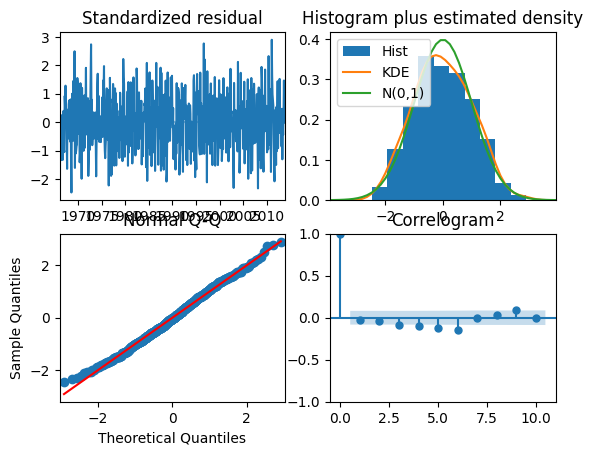

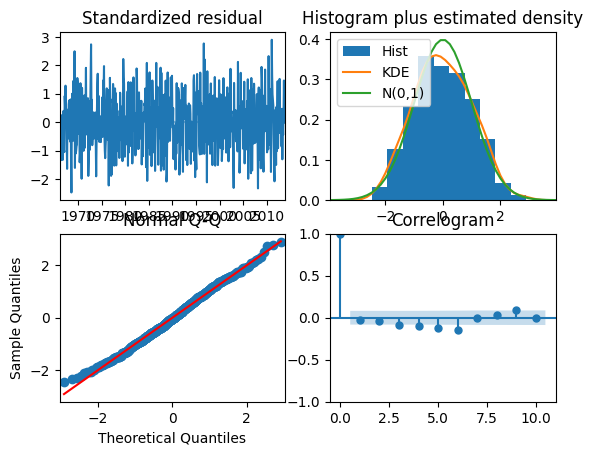

In [193]:
results.plot_diagnostics()

In [194]:
from pmdarima.model_selection import train_test_split

In [227]:
train, test = train_test_split(df, test_size =0.1)

In [228]:
test.shape

(59, 1)

In [229]:
prediction = pd.DataFrame(results.predict(n_periods = 59), test.index)
prediction.columns = ["predicted_sales"]
test["predicted_sales"] = prediction

In [230]:
test

,Sales,predicted_sales
Month,,
2009-02-01,965.90,NaN
2009-03-01,1232.48,NaN
2009-04-01,970.75,NaN
2009-05-01,825.91,NaN
2009-06-01,871.02,NaN
2009-07-01,1073.35,NaN
2009-08-01,934.23,NaN
2009-09-01,1191.29,NaN
2009-10-01,912.38,NaN


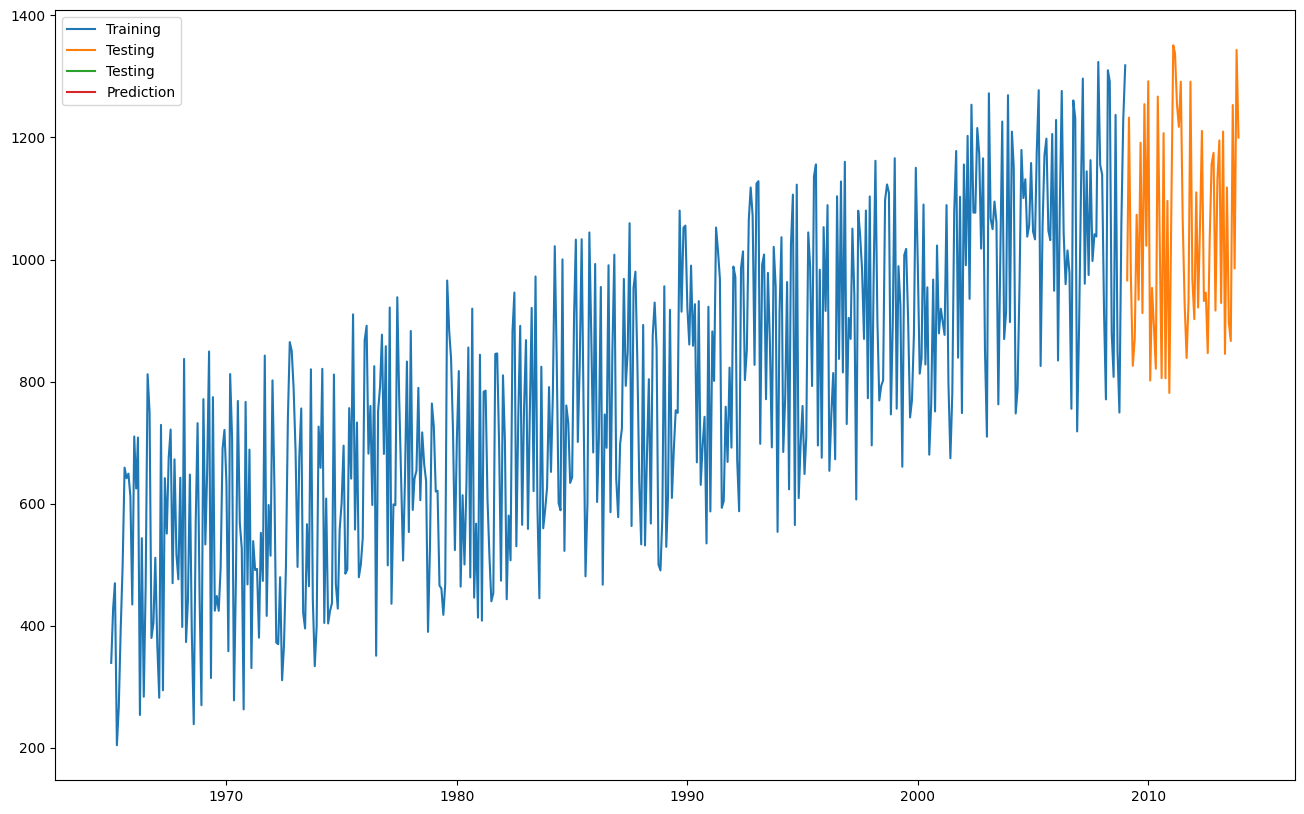

In [231]:
plt.figure(figsize = (16,10))
plt.plot(train, label = "Training")
plt.plot(test, label = "Testing")
plt.plot(prediction, label = "Prediction")
plt.legend()

In [232]:
df.shape

(588, 1)

In [240]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,60)]

In [241]:
future_dates

[Timestamp('2013-12-01 00:00:00'),
 Timestamp('2014-01-01 00:00:00'),
 Timestamp('2014-02-01 00:00:00'),
 Timestamp('2014-03-01 00:00:00'),
 Timestamp('2014-04-01 00:00:00'),
 Timestamp('2014-05-01 00:00:00'),
 Timestamp('2014-06-01 00:00:00'),
 Timestamp('2014-07-01 00:00:00'),
 Timestamp('2014-08-01 00:00:00'),
 Timestamp('2014-09-01 00:00:00'),
 Timestamp('2014-10-01 00:00:00'),
 Timestamp('2014-11-01 00:00:00'),
 Timestamp('2014-12-01 00:00:00'),
 Timestamp('2015-01-01 00:00:00'),
 Timestamp('2015-02-01 00:00:00'),
 Timestamp('2015-03-01 00:00:00'),
 Timestamp('2015-04-01 00:00:00'),
 Timestamp('2015-05-01 00:00:00'),
 Timestamp('2015-06-01 00:00:00'),
 Timestamp('2015-07-01 00:00:00'),
 Timestamp('2015-08-01 00:00:00'),
 Timestamp('2015-09-01 00:00:00'),
 Timestamp('2015-10-01 00:00:00'),
 Timestamp('2015-11-01 00:00:00'),
 Timestamp('2015-12-01 00:00:00'),
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('2016-02-01 00:00:00'),
 Timestamp('2016-03-01 00:00:00'),
 Timestamp('2016-04-

In [242]:
future_date_df = pd.DataFrame(index = future_dates[1:],columns = df.columns)

In [243]:
future_date_df.tail()

,Sales
2018-07-01,NaN
2018-08-01,NaN
2018-09-01,NaN
2018-10-01,NaN
2018-11-01,NaN


In [244]:
future_date_df.shape

(59, 1)

In [245]:
future_date_df["forecast"] = results.predict(n_periods = 59,dynamic  = True )
future_df = pd.concat([df,future_date_df])
future_df

,Sales,forecast
1965-01-01,339.28,NaN
1965-02-01,429.62,NaN
1965-03-01,469.72,NaN
1965-04-01,204.26,NaN
1965-05-01,266.88,NaN
...,...,...
2018-07-01,NaN,1384.355716
2018-08-01,NaN,1316.018933
2018-09-01,NaN,1568.537739
2018-10-01,NaN,1485.618268


<AxesSubplot:>

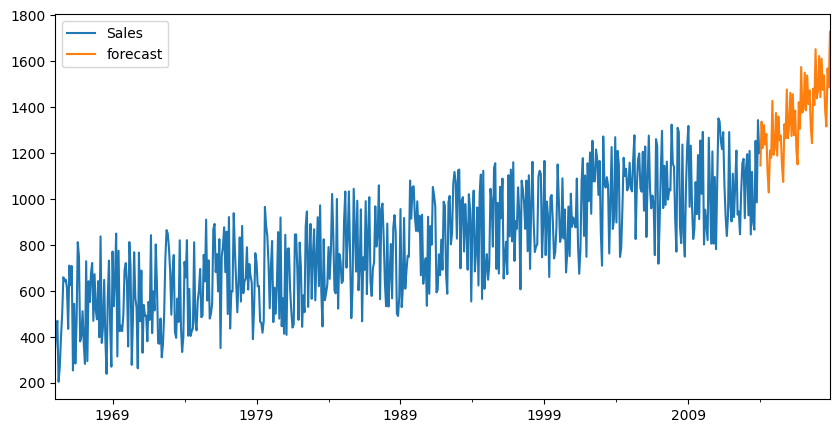

In [253]:
future_df.plot(figsize=(10, 5))

In [208]:
future_df.to_csv("FinalProjectSuccess.csv")